In [13]:
import numpy as np

from template_funciones_2 import calcula_L, calcula_lambda, calcula_R, calcula_Q, metpot1, metpot2, metpotI,  metpotI2, laplaciano_iterativo, calcula_2E

In [14]:
A = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])
L = calcula_L(A)
L

array([[ 3., -1., -1., -1.,  0.,  0.,  0.,  0.],
       [-1.,  3., -1., -1.,  0.,  0.,  0.,  0.],
       [-1., -1.,  4., -1.,  0., -1.,  0.,  0.],
       [-1., -1., -1.,  4., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  4., -1., -1., -1.],
       [ 0.,  0., -1.,  0., -1.,  4., -1., -1.],
       [ 0.,  0.,  0.,  0., -1., -1.,  3., -1.],
       [ 0.,  0.,  0.,  0., -1., -1., -1.,  3.]])

Para encontrar $\Lambda$ tenemos que encontrar el vector $s^{\Lambda}$ optimo que la minimice. Eso equivale a hallar el autovector asociado al segundo autovalor mas pequeño en modulo de $L$ 

In [16]:
v1, l1, _ = metpotI2(A, 0.1)
LAMBDA = calcula_lambda(L, v1)
LAMBDA

np.float64(6.0)

Para hallar el corte minimo podemos hacer recursion sobre la red separandola en $k$ iteraciones. Obteniendo asi $2^{k}$ comunidades.

In [10]:
k = 2
laplaciano_iterativo(A, k)

[[6, 7], [4, 5], [3], [0, 1, 2]]

Otra forma de hallar comunidades tiene que ver con la **modularidad**. Donde el objetivo esta en maximizar $Q$. Para eso necesitamos el autovector con autovalor de mayor modulo de la matriz $R = A - P$. $R$ es simetrica. La modularidad puede calcularse entonces como $Q = \frac{1}{4E} s^{t}Rs$ con $2E = \sum_{i}^{n} \sum_{j}^{n} A_{ij}$

In [ ]:
#Calculamos R
R = calcula_R(A)

print(f"Vemos que R es simetrica, R = R^t: \n{R == R.T}")
#Calculamos su autovector con autovalor de mayor modulo con el metodo de la potencia
v1, l1, _ = metpot1(R)

print(f"\nAutovector: {v1}\nAsociado a λ_1 = {l1}")

Q = calcula_Q(R, v1)

E2 = calcula_2E(A)

# Hace falta dividir por 1/4E ???
Q = Q * 1/(2*E2)
print(f"\nLa modularidad de la red es {Q}")


Vemos que R es simetrica, R = R^t: 
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]

Autovector: [ 0.38474794  0.38474797  0.31931298  0.31933876 -0.31933876 -0.31931299
 -0.38474793 -0.38474797]
Asociado a λ_1 = 2.9812811412723246

La modularidad de la red es 0.4209183673469387


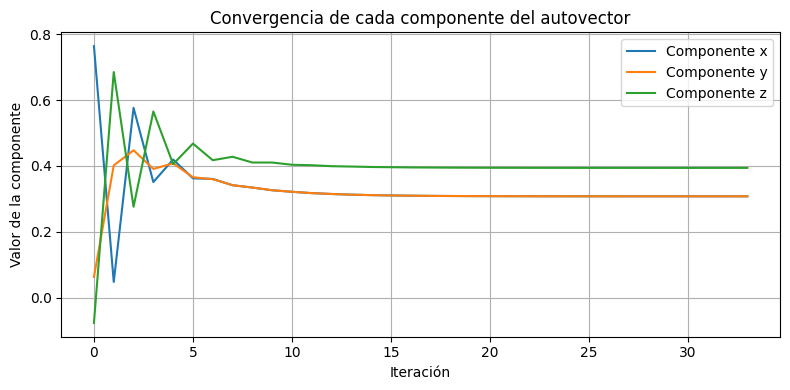

TypeError: Axes3D.scatter() got multiple values for argument 'c'

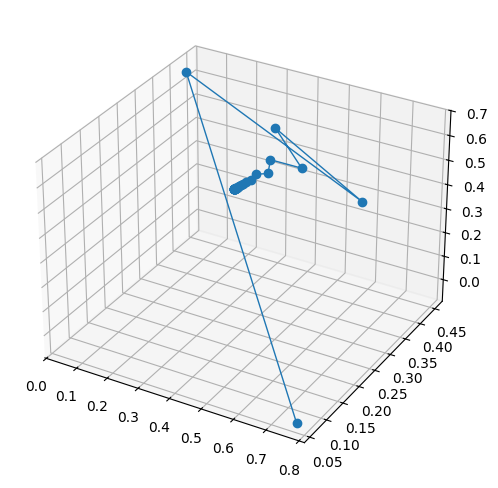

In [ ]:
def metpot(A,v,k):
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
    return v

avec, aval, _ = metpot1(A, 1e-10, plot=True)


In [8]:
v = np.array([0.57735027,0.57735027,0.57735027])

np.where(v < 0)

(array([], dtype=int64),)